In [1]:
#___________________________________________________________________________________________________________________
get_ipython().magic('matplotlib notebook')
get_ipython().magic('load_ext autoreload')
get_ipython().magic('autoreload 2')

import matplotlib.pyplot as plt
import sys
import os
sys.path.append("./src/")
from sub_mesh        import * 
from sub_data        import * 
from sub_plot        import * 
from sub_climatology import *
from colormap_c2c    import colormap_c2c
import time as time 

#___LOAD FESOM2 MESH___________________________________________________________________________________
meshpath='/work/ollie/projects/clidyn/FESOM2/meshes/core2/'
mesh=load_mesh_fesom2(meshpath, do_rot='None', focus=0, do_info=True, do_pickle=True,
                      do_earea=True, do_narea=True, do_eresol=[True,'mean'], do_nresol=[True,'eresol'])

 > found *.pckl file: /work/ollie/pscholz/meshcache_tripyview/core2
 > load  *.pckl file: tripyview_fesom2_core2.pckl
___FESOM2 MESH INFO________________________
 > path            = /work/ollie/projects/clidyn/FESOM2/meshes/core2
 > id              = core2
 > do rot          = None
 > [al,be,ga]      = 50, 15, -90
 > do augmpbnd     = True
 > do cavity       = False
 > do lsmask       = True
 > do earea,eresol = True, True
 > do narea,nresol = True, True
___________________________________________
 > #node           = 126858
 > #elem           = 244659
 > #lvls           = 48
___________________________________________


___FESOM2 DATA INFO________________________
 > Dimensions : Frozen(SortedKeysDict(OrderedDict([('nod2', 126858)])))
 > Coordinates:
    nz1      int64 1000
 > Data variables:
    temp     (nod2) float32 nan nan nan nan 0.35714784 ... 6.0975366 nan nan nan
 ___________________________________________


/home/ollie/pscholz/miniconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<IPython.core.display.Javascript object>


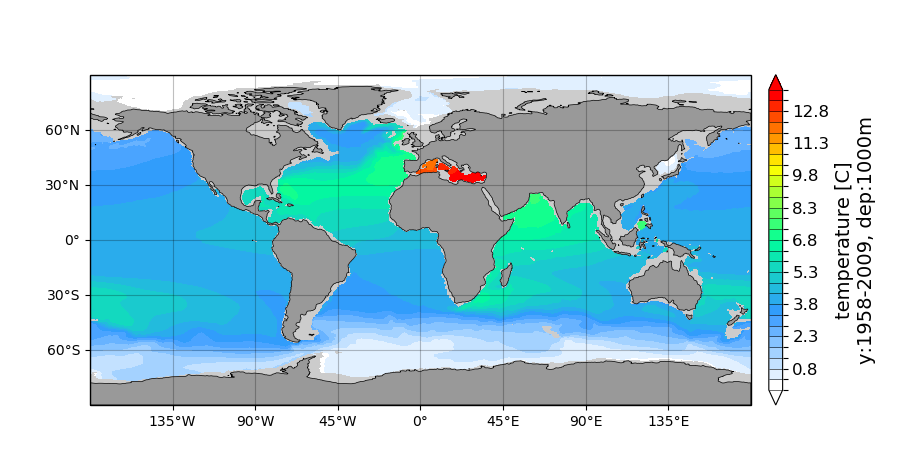

In [9]:
#___LOAD FESOM2 DATA___________________________________________________________________________________
#datapath        = '~/results/test_core2_ncep_5/1/'
datapath        = '~/results/test_speed_core2/1/'
vname           = 'temp'
year            = [1958,2009]
mon, day, record= None, None, None
depth           = 1000 #np.arange(1000,2000+1,100)
box             = None #[-80,20,0,85]
data            = load_data_fesom2(mesh, datapath, vname=vname, 
                                   year=year, mon=mon, day=day, record=record, 
                                   depth=depth, descript=vname)

#___PLOT FESOM2 DATA___________________________________________________________________________________
cinfo=dict({'cstr':'wbgyr', 'cnum':20})
fig, ax, cbar = plot_hslice(mesh, data, cinfo=cinfo, box=box, do_lsmask='fesom') 
                            #, do_save='~/figures/test_tripyview/test.png')

<IPython.core.display.Javascript object>


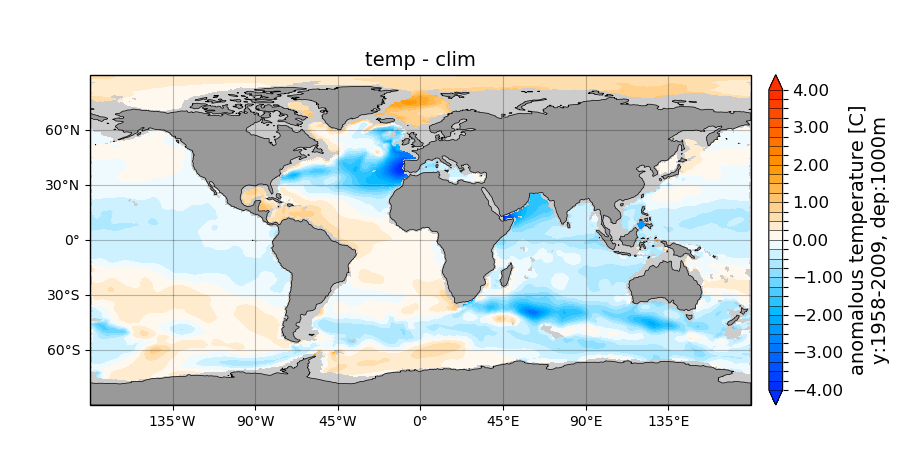

In [10]:
#___LOAD CLIMATOLOGY DATA________________________________________________________________________________
climpath, vname = '~/fesom2.0_github/view/phc3/phc3.0_annual.nc', 'temp'
#climpath, vname = '~/fesom2.0_github/view/woa2005/woa2005TS.nc', 't00an1'
clim = load_climatology(mesh, climpath, vname, depth=depth)


#___PLOT ANOMALOUS DATA__________________________________________________________________________________
anom = do_anomaly(data,clim)
cinfo=dict({'cstr':'blue2red', 'cnum':20, 'crange':[-4,4,0]})
fig, ax, cbar = plot_hslice(mesh, anom, cinfo=cinfo, box=box, do_lsmask='fesom', title='descript') #[-80,20,0,85]